In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
amar5693/screen-time-sleep-and-stress-analysis-dataset          Screen Time, Sleep & Stress Analysis Dataset            787136  2026-02-13 06:56:18.757000           3321         67  1.0              
amar5693/student-performance-dataset                            Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           3129         49  1.0              
aliiihussain/amazon-sales-dataset                               Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           6809        111  1.0              


In [ ]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.76GB/s]


In [ ]:
!unzip -q fer2013.zip -d /content/fer2013


In [ ]:
import os


In [ ]:
train_dir = "/content/fer2013/train"

In [ ]:
test_dir = "/content/fer2013/test"

In [ ]:
emotions = sorted(os.listdir(train_dir))

In [ ]:
for emotion in emotions:
    count = len(os.listdir(os.path.join(train_dir, emotion)))
    print(f"  {emotion}: {count} images")

  angry: 3995 images
  disgust: 436 images
  fear: 4097 images
  happy: 7215 images
  neutral: 4965 images
  sad: 4830 images
  surprise: 3171 images


In [ ]:
for emotion in emotions:
    count = len(os.listdir(os.path.join(test_dir, emotion)))
    print(f"  {emotion}: {count} images")

  angry: 958 images
  disgust: 111 images
  fear: 1024 images
  happy: 1774 images
  neutral: 1233 images
  sad: 1247 images
  surprise: 831 images


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import cv2
import random

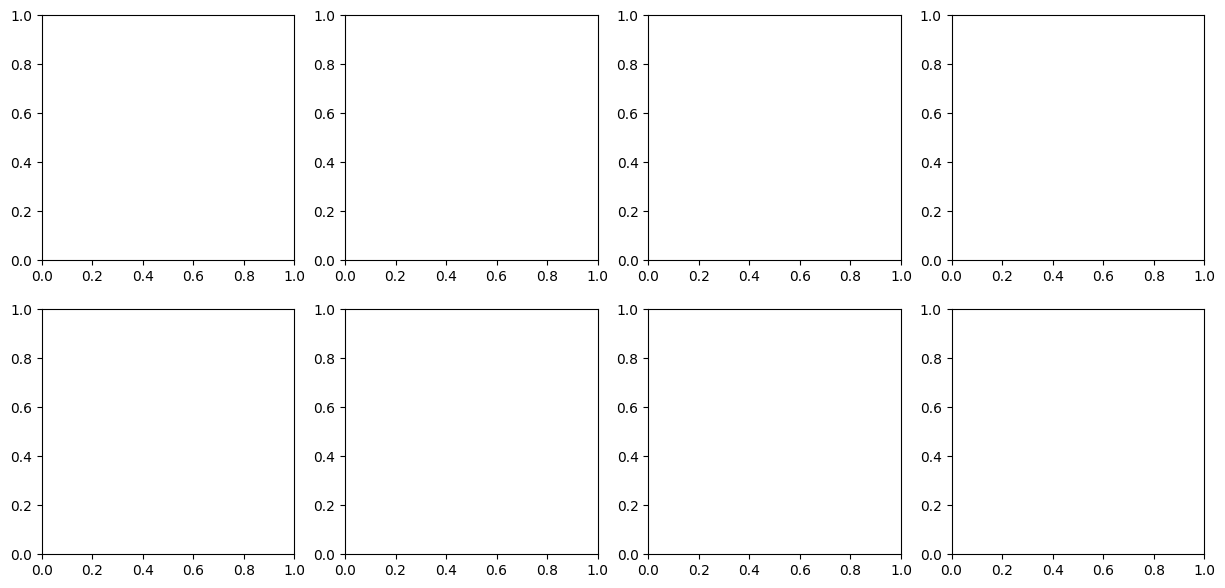

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()

In [ ]:
for i, emotion in enumerate(emotions):
    emotion_path = os.path.join(train_dir, emotion)

    sample_img = random.choice(os.listdir(emotion_path))
    img_path = os.path.join(emotion_path, sample_img)

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"{emotion}", fontsize=14, fontweight='bold')
    axes[i].axis('off')

In [ ]:
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
from PIL import Image

In [ ]:
emotions = sorted(os.listdir(train_dir))

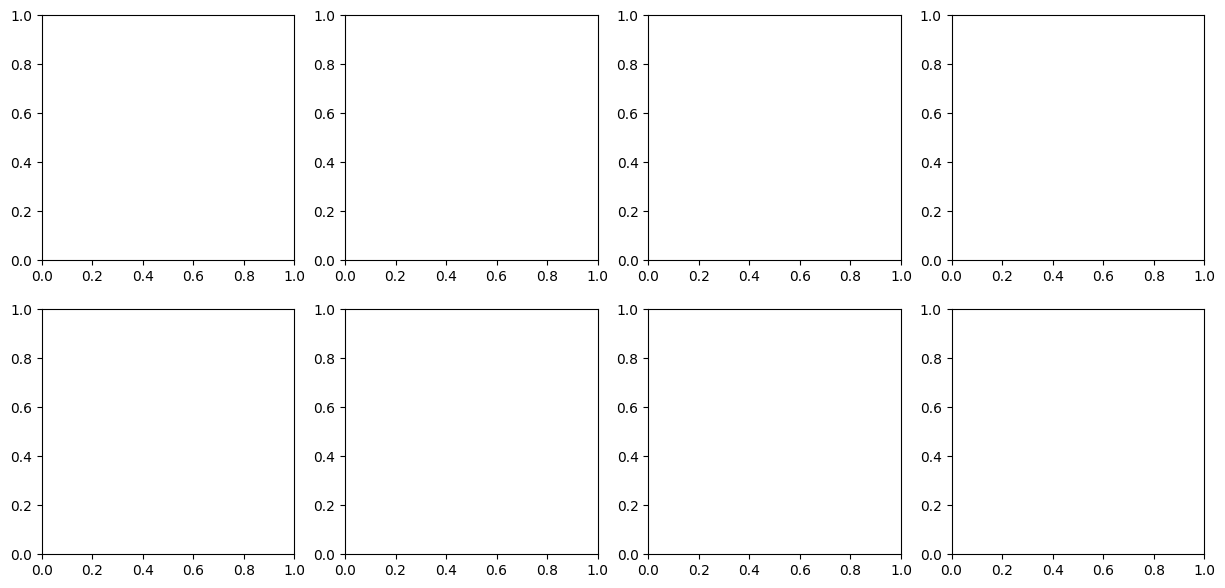

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()

In [ ]:
for i, emotion in enumerate(emotions):
    emotion_path = os.path.join(train_dir, emotion)
    sample_img = random.choice(os.listdir(emotion_path))
    img_path = os.path.join(emotion_path, sample_img)


    img = Image.open(img_path).convert('L')

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"{emotion}", fontsize=14, fontweight='bold')
    axes[i].axis('off')


fig.delaxes(axes[7])

plt.suptitle("FER2013 Dataset Samples", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


sample_path = os.path.join(train_dir, emotions[0], os.listdir(os.path.join(train_dir, emotions[0]))[0])
sample = Image.open(sample_path)
print(f"\n Image size: {sample.size}")

<Figure size 640x480 with 0 Axes>


 Image size: (48, 48)


Showing: happy - Training_70988378.jpg


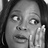

Image shape: (48, 48)


In [ ]:

from IPython.display import Image as IPImage, display

emotion = 'happy'
emotion_path = os.path.join(train_dir, emotion)
sample_img = os.listdir(emotion_path)[0]
img_path = os.path.join(emotion_path, sample_img)

print(f"Showing: {emotion} - {sample_img}")
display(IPImage(filename=img_path))


import cv2
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(f"Image shape: {img.shape}")

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("GPU Available:", tf.config.list_physical_devices('GPU'))

IMG_SIZE = 48
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

print(f"\n Training samples: {train_generator.samples}")
print(f" Validation samples: {val_generator.samples}")
print(f" Test samples: {test_generator.samples}")
print(f"\nClasses: {list(train_generator.class_indices.keys())}")

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.

 Training samples: 22968
 Validation samples: 5741
 Test samples: 7178

Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:

model = keras.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),


    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),


    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),


    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,003,143 (22.90 MB)

 Trainable params: 5,999,815 (22.89 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001,
    verbose=1
)


print("Starting training")
print("=" * 60)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n Training complete!")


Starting training
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 101ms/step - accuracy: 0.1670 - loss: 2.9814 - val_accuracy: 0.2500 - val_loss: 1.9138 - learning_rate: 1.0000e-04
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2011 - loss: 2.5453 - val_accuracy: 0.2468 - val_loss: 1.9322 - learning_rate: 1.0000e-04
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2162 - loss: 2.3728 - val_accuracy: 0.2864 - val_loss: 1.8311 - learning_rate: 1.0000e-04
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.2294 - loss: 2.2378 - val_accuracy: 0.3170 - val_loss: 1.7505 - learning_rate: 1.0000e-04
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2565 - loss: 2.1000 - val_accuracy: 0.3161 - val_loss: 1.7403 - learning_rate: 1.0000e-04
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2774 - loss: 2.0026 - val_accuracy: 0.2940 - val_loss: 1.8202 - learning_rate: 1.0000e-04
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accura

In [ ]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n Test Accuracy: {test_accuracy*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5487 - loss: 1.1526

 Test Accuracy: 59.28%
 Test Loss: 1.0580


In [ ]:
save_path = '/content/drive/MyDrive/emotion_model.h5'
model.save(save_path)
print(f"Model saved to: {save_path}")

save_path_keras = '/content/drive/MyDrive/emotion_model.keras'
model.save(save_path_keras)
print(f" Model also saved as: {save_path_keras}")

Model saved to: /content/drive/MyDrive/emotion_model.h5
 Model also saved as: /content/drive/MyDrive/emotion_model.keras
